# Questão 3
Implemente o algoritmo K-means e considere o dados apresentados na tabela abaixo para serem usando no processo de clustering.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = [-7.82,-6.68,4.36,6.72,-8.64,-6.87,4.47,6.73,-7.71,-6.91,6.18,6.72,-6.25,-6.94,8.09,6.81,-5.19,-6.38,4.08,6.27]
x2 = [-4.58,3.16,-2.19,0.88,3.06,0.57,-2.62,-2.01,2.34,-0.49,2.81,-0.93,-0.26,-1.22,0.20,0.17,4.24,-1.74,1.30,0.93]
x3 = [-3.97,2.71,2.09,2.80,3.50,-5.45,5.76,4.18,-6.33,-5.68,5.82,-4.04,0.56,1.13,2.25,-4.15,4.04,1.43,5.33,-2.78]
dados = []
for i,j,k in zip(x1,x2,x3):
    dados.append([i,j,k])
    
dados = np.array(dados)
print('Amostras:\n'+str(dados))

Amostras:
[[-7.82 -4.58 -3.97]
 [-6.68  3.16  2.71]
 [ 4.36 -2.19  2.09]
 [ 6.72  0.88  2.8 ]
 [-8.64  3.06  3.5 ]
 [-6.87  0.57 -5.45]
 [ 4.47 -2.62  5.76]
 [ 6.73 -2.01  4.18]
 [-7.71  2.34 -6.33]
 [-6.91 -0.49 -5.68]
 [ 6.18  2.81  5.82]
 [ 6.72 -0.93 -4.04]
 [-6.25 -0.26  0.56]
 [-6.94 -1.22  1.13]
 [ 8.09  0.2   2.25]
 [ 6.81  0.17 -4.15]
 [-5.19  4.24  4.04]
 [-6.38 -1.74  1.43]
 [ 4.08  1.3   5.33]
 [ 6.27  0.93 -2.78]]


## Funções usadas

In [2]:
def dist(a,b):
    '''Calcula distância entre ponto1 e ponto2. Ambos devem ser arrays do numpy.'''
    a=np.array([a]); b=np.array([b])
    return np.sqrt(np.sum(a-b)**2)

def centro(pontos):
    '''Calcula centróide de um conjunto de pontos.'''
    if pontos==[]:
        return []
    centroide = []
    pontos=np.array(pontos)
    for i in range(len(pontos[0])):
        soma = 0
        for j in range(len(pontos)):
            soma += pontos[j][i]
        centroide.append(soma/len(pontos)) 
    return np.array(centroide)


def MSE(a,b):
    '''Calcula erro médio quadrático em uma lista de amostras. Primeiro são 
    calculados as médias quadráticas elemento a elemento de **a** e **b**. As 
    várias médias são associadas em um único valor, que é retornado.'''
    a=np.array(a); b=np.array(b)
    soma = 0
    for i,j in zip(a,b):
        soma += np.array(((i-j)**2).mean())
    return soma/len(a)


def kMeans(dados, iter_max=10, centroides=0):
    '''Esta função implementa até `iter_max` iterações do algoritmo k-means. 
    A segunda condição de parada é os centróides pararem de variar.'''
    if centroides==0:
        print('Erro: Não foram passados centróides iniciais')
        return centroides
    
    dados = np.array(dados)  # só pra garantir
    centroides = np.array(centroides)
    cont = [[],[],[]]  # cont[i] = lista de amostras(pontos) na classe i
    varia=[]  # histórico do erro médio quadrático
    for i in range(iter_max):
        
        # CLASSIFICANDO PONTOS
        for d in dados:
            distancias = []  # lista com distâncias do dado 'd' aos centroides
            for c in centroides:
                distancias.append(dist(d,c))  # len(centroides) = len(distancias)
            cont[np.argmin(distancias)].append(d)  # guarda 'd' em uma das listas em 'cont' com base na menor distância calculada
        
        # ATUALIZANDO CENTRÓIDES
        novo_centro = []  # lista com novos centróides
        for classe,centroide_ant in zip(cont,centroides):
            if len(classe)>0:  # # houver pontos na classe
                novo_centro.append(centro(classe))  # calcula o centro de cada classe
            else:
                novo_centro.append(centroide_ant)  # centroide fica no mesmo lugar

        #CENTROS: COMPARANDO NOVO COM ANTEIOR
        varia.append(MSE(novo_centro, centroides))
        if varia[-1]<1e-2: # Limiar de aceitação da variação (1%)
            break  # Sai do FOR maior
        else:
            centroides = novo_centro.copy()  # Atualiza valores de 'centroides'
        
    return centroides, varia


 Como a função recebe os centróides iniciais, já está implicito o K que será usado.

## Primeiro caso
Centróides iniciais são $(0,0,0)$, $(1,1,1)$ e $(-1,0,2)$.

A partir da segunda iteração é calculada o erro médio quadrático entre cada centróide e sua versão anterior pela  fórmula abaixo: $$MSE = \displaystyle\frac{1}{N}\sum_{i=1}^{N}(x_{i,atual}-x_{i,ant})^{2} $$
Como neste problema temos 3 centróides, há 3 erros a serem calculados. Em seguinda, calculamos a média desses erros e verificamos se ela é maior que 2%. O método `kmeans()` acima pára a execução quando o erro está abaixo do limiar.

Iterações necessárias=5
centroides calculados: 
[[-7.03 -0.51 -2.23]
 [ 5.62  0.19  3.71]
 [ 0.8   1.11  0.  ]]


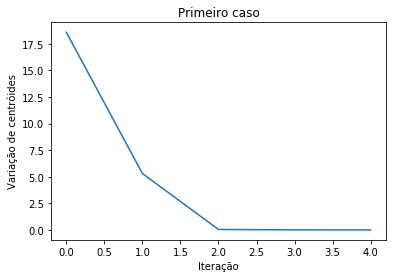

In [5]:
centroides = [[0,0,0],[1,1,1],[-1,0,2]]
result,erro = kMeans(dados, 50, centroides)
print('Iterações necessárias='+str(len(erro)))
print('centroides calculados: \n'+str(np.round(result,2)))
plt.plot(erro)
plt.title('Primeiro caso')
plt.xlabel('Iteração')
plt.ylabel('Variação de centróides')
plt.show()

## Segundo caso
Centróides iniciais são $(-0.1,0,0.1)$, $(0,-0.1,0.1)$ e $(-0.1,-0.1,0.1)$.

Iterações necessárias=5
centroides calculados: 
[[ 5.63  0.1   3.19]
 [ 0.02  1.4   0.25]
 [-7.03 -0.51 -2.23]]


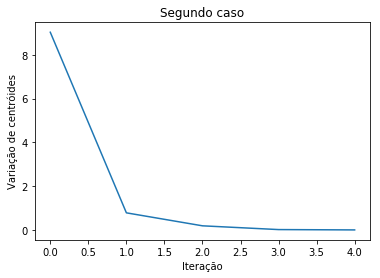

In [6]:
centroides = [[-0.1, 0, 0.1],[0, -0.1, 0.1],[-0.1, -0.1, 0.1]]
result,erro = kMeans(dados, 50, centroides)
print('Iterações necessárias='+str(len(erro)))
print('centroides calculados: \n'+str(np.round(result,2)))
plt.plot(erro)
plt.title('Segundo caso')
plt.xlabel('Iteração')
plt.ylabel('Variação de centróides')
plt.show()

**OBS**: Os centróides calculados não aparecem na mesma ordem. 

Notamos que em ambos os casos os clusters tendem a convergir para o mesmo lugar. Mas no segundo caso, a convergência é mais rápida.